Task 1

=== Feedforward Neural Network Demo ===
Solving XOR problem...
Network architecture: 2 -> 4 -> 1
Training...
Epoch 100/2000, Loss: 0.250059
Epoch 200/2000, Loss: 0.250044
Epoch 300/2000, Loss: 0.250032
Epoch 400/2000, Loss: 0.250021
Epoch 500/2000, Loss: 0.250011
Epoch 600/2000, Loss: 0.250001
Epoch 700/2000, Loss: 0.249991
Epoch 800/2000, Loss: 0.249979
Epoch 900/2000, Loss: 0.249966
Epoch 1000/2000, Loss: 0.249950
Epoch 1100/2000, Loss: 0.249930
Epoch 1200/2000, Loss: 0.249904
Epoch 1300/2000, Loss: 0.249871
Epoch 1400/2000, Loss: 0.249825
Epoch 1500/2000, Loss: 0.249760
Epoch 1600/2000, Loss: 0.249665
Epoch 1700/2000, Loss: 0.249518
Epoch 1800/2000, Loss: 0.249278
Epoch 1900/2000, Loss: 0.248857
Epoch 2000/2000, Loss: 0.248066

=== Testing Results ===
Input: [0 0] | Expected: 0 | Predicted: 0.4833
Input: [0 1] | Expected: 1 | Predicted: 0.4906
Input: [1 0] | Expected: 1 | Predicted: 0.5133
Input: [1 1] | Expected: 0 | Predicted: 0.5120

Accuracy: 50.00%


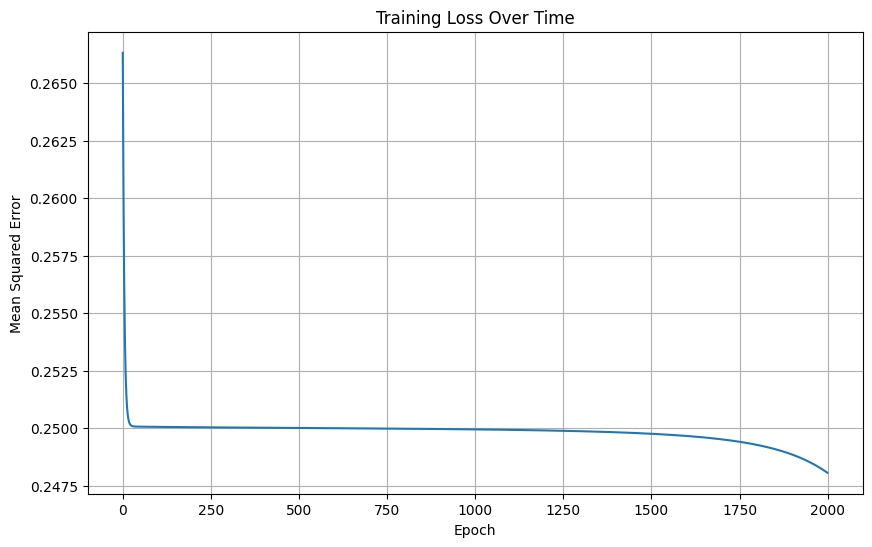


=== Network Parameters ===
Weights W1 (Input -> Hidden):
[[-0.67679427  0.15063814 -0.50517506  0.3731281 ]
 [ 0.71443071 -0.0413634  -1.13604128 -0.74975494]]

Biases b1 (Hidden layer):
[[ 0.02782785 -0.03839804 -0.08968391 -0.37996343]]

Weights W2 (Hidden -> Output):
[[ 0.05579952]
 [ 0.1994389 ]
 [-0.50472948]
 [ 0.64923196]]

Biases b2 (Output layer):
[[-0.21535096]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class FeedforwardNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        """
        Initialize the feedforward neural network with 3 layers.
        
        Args:
            input_size (int): Number of neurons in input layer
            hidden_size (int): Number of neurons in hidden layer
            output_size (int): Number of neurons in output layer
            learning_rate (float): Learning rate for training
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights randomly with small values
        # Weights between input and hidden layer
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.5
        # Weights between hidden and output layer
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.5
        
        # Initialize biases
        self.b1 = np.zeros((1, self.hidden_size))
        self.b2 = np.zeros((1, self.output_size))
        
        # Store activations for backpropagation
        self.z1 = None  # Hidden layer input (before activation)
        self.a1 = None  # Hidden layer output (after activation)
        self.z2 = None  # Output layer input (before activation)
        self.a2 = None  # Output layer output (after activation)
    
    def sigmoid(self, x):
        """
        Sigmoid activation function.
        
        Args:
            x (numpy.ndarray): Input array
            
        Returns:
            numpy.ndarray: Sigmoid of input
        """
        # Clip x to prevent overflow
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        """
        Derivative of sigmoid function.
        
        Args:
            x (numpy.ndarray): Input array (output of sigmoid)
            
        Returns:
            numpy.ndarray: Derivative of sigmoid
        """
        return x * (1 - x)
    
    def forward(self, X):
        """
        Forward propagation through the network.
        
        Args:
            X (numpy.ndarray): Input data of shape (samples, features)
            
        Returns:
            numpy.ndarray: Output predictions
        """
        # Input to hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        
        # Hidden to output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2
    
    
    def get_parameters(self):
        """
        Get current network parameters.
        
        Returns:
            dict: Dictionary containing weights and biases
        """
        return {
            'W1': self.W1,
            'b1': self.b1,
            'W2': self.W2,
            'b2': self.b2
        }
    
    def set_parameters(self, params):
        """
        Set network parameters.
        
        Args:
            params (dict): Dictionary containing weights and biases
        """
        self.W1 = params['W1']
        self.b1 = params['b1']
        self.W2 = params['W2']
        self.b2 = params['b2']

